Data Point 1:
Latitude: -14.2724
Longitude: -54.1395
Timestamp: 1720012310
Readable Time: 2024-07-03 21:11:50

Data Point 2:
Latitude: -14.9162
Longitude: -53.6382
Timestamp: 1720012323
Readable Time: 2024-07-03 21:12:03

Data Point 3:
Latitude: -15.4599
Longitude: -53.2113
Timestamp: 1720012334
Readable Time: 2024-07-03 21:12:14

Data Point 4:
Latitude: -16.4457
Longitude: -52.4291
Timestamp: 1720012354
Readable Time: 2024-07-03 21:12:34

Data Point 5:
Latitude: -17.0354
Longitude: -51.9555
Timestamp: 1720012366
Readable Time: 2024-07-03 21:12:46

Data Point 6:
Latitude: -17.8441
Longitude: -51.2990
Timestamp: 1720012382
Readable Time: 2024-07-03 21:13:02

Data Point 7:
Latitude: -20.3256
Longitude: -49.2262
Timestamp: 1720012434
Readable Time: 2024-07-03 21:13:54

Data Point 8:
Latitude: -21.3869
Longitude: -48.3098
Timestamp: 1720012456
Readable Time: 2024-07-03 21:14:16

Data Point 9:
Latitude: -22.0590
Longitude: -47.7192
Timestamp: 1720012470
Readable Time: 2024-07-03 21:14:30

D

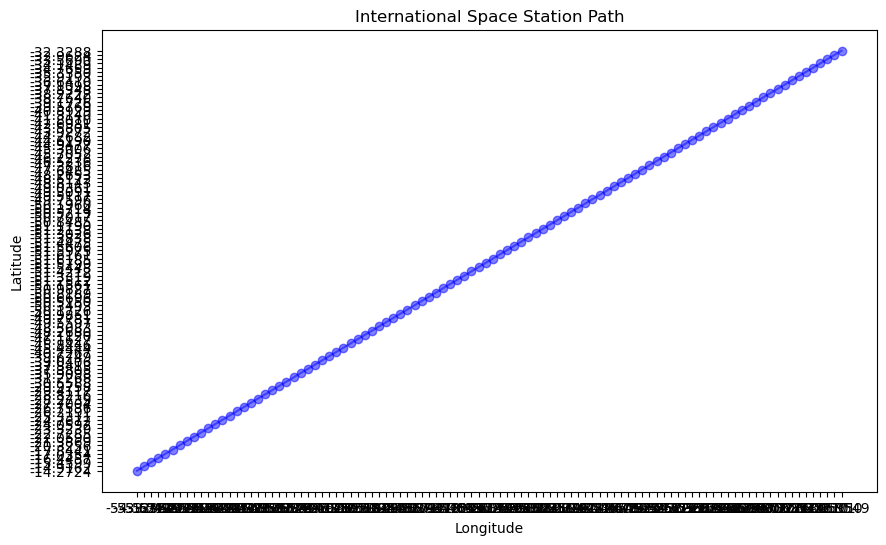

{'latitudes': ['-14.2724', '-14.9162', '-15.4599', '-16.4457', '-17.0354', '-17.8441', '-20.3256', '-21.3869', '-22.0590', '-22.7285', '-23.3239', '-24.0592', '-24.7672', '-25.3311', '-26.2191', '-26.7536', '-27.7004', '-28.2739', '-28.8216', '-29.4117', '-29.9758', '-30.5588', '-31.2268', '-35.9098', '-37.3805', '-37.8413', '-39.0406', '-39.6749', '-40.7267', '-45.4444', '-45.8446', '-46.1627', '-47.1120', '-48.2680', '-48.5083', '-49.5597', '-49.7781', '-49.9851', '-50.1726', '-50.3493', '-50.5150', '-50.6696', '-50.8189', '-50.9827', '-51.1561', '-51.2512', '-51.3319', '-51.4212', '-51.5448', '-51.5799', '-51.6185', '-51.6161', '-51.5975', '-51.5606', '-51.4475', '-51.3838', '-51.3026', '-51.2138', '-51.1190', '-50.8485', '-50.7017', '-50.5219', '-50.3714', '-50.1960', '-49.7596', '-49.5117', '-49.3091', '-49.0361', '-48.8143', '-48.5172', '-48.2653', '-47.6485', '-47.3816', '-46.5236', '-46.2278', '-45.7052', '-45.3006', '-44.9477', '-44.6190', '-44.2682', '-43.9272', '-43.5805', '

In [1]:
import requests
import matplotlib.pyplot as plt
import time
import datetime

def get_iss_location(point):
    try:
        data = requests.get('http://api.open-notify.org/iss-now.json').json()
        lat = data['iss_position']['latitude']
        lon = data['iss_position']['longitude']
        ts = data['timestamp']
        iss['latitudes'].append(lat)
        iss['longitudes'].append(lon)
        iss['timestamps'].append(ts)
        print('Data Point ' + str(point + 1) + ':\nLatitude: ' + str(lat) + '\nLongitude: ' + str(lon) + '\nTimestamp: ' + str(ts) + '\nReadable Time: ' + unix_to_readable_time(ts) + '\n')
    except requests.exceptions.RequestException as e:
        get_iss_location(point)
    return 0

def unix_to_readable_time(unixtime):
    return datetime.datetime.fromtimestamp(unixtime).strftime('%Y-%m-%d %H:%M:%S')

def create_plot(title, xvalues, yvalues, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(xvalues, yvalues, marker='o', linestyle='-', color='b', alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def iss_tracker(points, interval):
    for i in range(points):
        get_iss_location(i)
        time.sleep(interval)
    create_plot('International Space Station Path', iss['longitudes'], iss['latitudes'], 'Longitude', 'Latitude')
    print(iss)

iss = {
    'latitudes': [],
    'longitudes': [],
    'timestamps': []
          }

iss_tracker(100,10)